# 研究背景、研究目的、研究意义

## 根据模式识别指导思想，训练一个能够对中枢神经系统疾病进行监控的AI模型。

    人工智能的核心工作内容，是通过对相关领域的内容进行研究，分析待解决的问题，并利用该类问题的相关数据，完成对该类问题的建模。一旦完成对该类问题的建模，那么原本需要由人来完成的该类工作，就可以完全交由机器完成，这使得人的大脑资源被解放出来，为其去完成更高的智能体工作提供资源上的可能性。
    在本研究中，通过理论分析和工程实践。完成一个原本需要多年训练才能诊断出脑疾病的“神经外科医生脑”的工作。

    “神经外科医生脑”的一项重要工作内容就是进行常见脑疾病的诊断。
    癫痫，即俗称“羊癫风”，是由多种病因引起的慢性脑功能障碍综合症，是仅次于脑血管病的第二大脑部疾病。癫痫发作的直接原因是脑部神经元反复地突发性过度放电所导致的间歇性中枢神经系统功能失调。临床上常表现为突然意识丧失、全身抽搐以及精神异常等。癫痫给患者带来巨大的痛苦和身心伤害，严重时甚至危及生命，儿童患者会影响到身体发育和智力发育。
    “神经外科医生脑”通过视觉系统观察，利用脑电图数据，在脑中完成特征的提取和选择、分类决策后，完成对癫痫的诊断。这是其在脑中完成的一套工作流程模式。但是该“神经外科医生脑”在完成癫痫的诊断工作时，存在一系列问题：包括耗时长、人为诊断的主观性、不同知识能力经验能力层次的“神经外科医生脑”往往存在同一患者不同诊断结果的误判问题。更重要的是，众所周知的医生培养周期时间十分漫长、而学习难度及其大中枢神经科医生的培养更是十分困难。
    因此，利用受人模式识别能力启发的模式识别技术，通过脑电图数据，训练一个“神经外科医生脑”，及时、准确地检测脑疾病是十分有必要且迫切关注科学和工程问题。

#  研究技术路线 、总体框架

## 加载、利用相关库函数

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import SimpleRNN, LSTM, GRU
from keras.optimizers import SGD, Nadam, Adam, RMSprop
from keras.callbacks import TensorBoard
from keras.utils import np_utils
import scipy.io 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
"""
第一步：导入数据
"""
# print('第一步：加载数据')
# 加载数据集

data = "F:\BCI Competition II\data.csv"
# define paremeter data.
df = pd.read_csv(data, header=0, index_col=0)
# define paremeter df.
# use:pd.read_csv function to solve data load problem. 
# data变量为预加载数据集的文件路径

## 查看数据集以及数据的相关信息

    波恩大学癫痫数据集：
    
    178个数据点（X1-X178)的11,500个样本（178个数据点= 1秒的脑电图记录）
    
    11,500个具有5个类别的目标：
    
    1个代表癫痫发作波形(癫痫模式波形）;
    而2-5代表非癫痫发作波形.
    
    at the last column,y value = 1,it needs target by human.

In [19]:
"""
查看数据集的head和信息
"""
df.head(n=10)
# paremeter inital n = 5
# the function will show n rows data.

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
X14.V1.56,55,28,18,16,16,19,25,40,52,66,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
X3.V1.191,-55,-9,52,111,135,129,103,72,37,0,...,-125,-99,-79,-62,-41,-26,11,67,128,4
X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
X3.V1.491,8,15,13,3,-6,-8,-5,4,25,41,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


## 将.csv格式的数据集利用plt（）函数还原为可视化的脑电波波形图图像

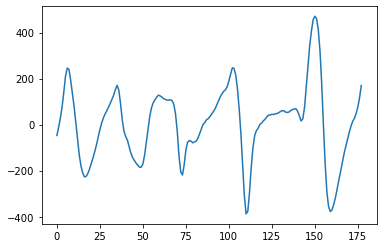

In [20]:
#绘制并观察脑电波
plt.plot(range(178), df.iloc[11496,0:178]) 
plt.show()

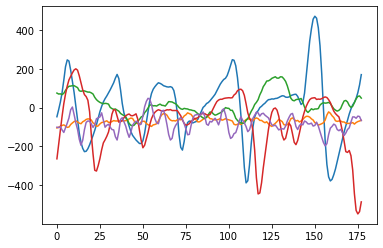

In [21]:
#绘制并观察脑电波
plt.plot(range(178), df.iloc[11496,0:178])
plt.plot(range(178), df.iloc[3,0:178]) 
plt.plot(range(178), df.iloc[134,0:178]) 
plt.plot(range(178), df.iloc[22,0:178]) 
plt.plot(range(178), df.iloc[777,0:178]) 
plt.show()

## 对数据集的再次预处理

In [22]:

    
    
"""
第一步：

设置标签：
将目标变量转换为癫痫(y列编码为1)与非癫痫(2-5)

即将癫痫的目标变量设置为1，其他设置为标签0

理解为癫痫模式与非癫痫模式的分类
"""


df["seizure"] = 0 
for i in range(11500): 
    if df["y"][i] == 1: 
        df["seizure"][i] = 1 
    else:
        df["seizure"][i] = 0
        



## 利用lstm进行建模

In [23]:
"""
第二步：
将把数据准备成神经网络可以接受的形式。
首先解析数据，
然后标准化值，
最后创建目标数组
"""
# 创建df1来保存波形数据点(waveform data points) 
df1 = df.drop(["seizure", "y"], axis=1)
"""
将数据部分转换为11500 *178形式，并设置数据类型为float64
"""
wave=np.array(df1,dtype=np.float64)
mean = wave.mean(axis=0) 
wave -= mean 
std = wave.std(axis=0)
wave /= std 
# 3. 创建目标数组
target = df["seizure"].values

"""
第三步：构建训练模型
"""
print('第三步：构建模型')

model = Sequential()
model.add(LSTM(10, return_sequences = True, input_shape=(None, 178)))
model.add(LSTM(10, return_sequences = True))
model.add(LSTM(5))
model.add(Dense(1, activation = 'sigmoid'))

model.summary() 


"""
利用sklearn的train_test_split函数将所有的数据的20%作为测试集，其他的作为训练集
"""
train_X, test_X, y_train, y_test = train_test_split(wave, target, test_size=0.2, random_state=42)

x_train = train_X.reshape(train_X.shape[0],1,train_X.shape[1])
x_test = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

#编译机器学习模型
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])


"""
第四步：训练模型
"""
print('第四步：训练模型')
"""
训练模型
epoch为100，
batch_size为128，
设置20%的数据集作为验证集
"""
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.2, verbose=2)



"""
第五步：计算最后得分和精度
"""
print('第五步：计算最后得分和精度')
score, acc = model.evaluate(x_test, y_test,
                            batch_size=1)
print('测试得分:', score)
print('测试精度:', acc)

第三步：构建模型
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 10)          7560      
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 10)          840       
_________________________________________________________________
lstm_6 (LSTM)                (None, 5)                 320       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 8,726
Trainable params: 8,726
Non-trainable params: 0
_________________________________________________________________
第四步：训练模型
Train on 7360 samples, validate on 1840 samples
Epoch 1/100
 - 1s - loss: 0.6681 - acc: 0.8011 - val_loss: 0.6443 - val_acc: 0.7793
Epoch 2/100
 - 0s - loss: 0.6012 - acc: 0.8058 - val_loss: 0.5718 - val_acc: 0.7793
Epoch 3/100
 - 0

Epoch 87/100
 - 0s - loss: 0.0052 - acc: 0.9986 - val_loss: 0.2337 - val_acc: 0.9620
Epoch 88/100
 - 0s - loss: 0.0060 - acc: 0.9982 - val_loss: 0.2359 - val_acc: 0.9614
Epoch 89/100
 - 0s - loss: 0.0050 - acc: 0.9986 - val_loss: 0.2384 - val_acc: 0.9603
Epoch 90/100
 - 0s - loss: 0.0059 - acc: 0.9984 - val_loss: 0.2268 - val_acc: 0.9620
Epoch 91/100
 - 0s - loss: 0.0058 - acc: 0.9982 - val_loss: 0.2420 - val_acc: 0.9603
Epoch 92/100
 - 0s - loss: 0.0054 - acc: 0.9984 - val_loss: 0.2306 - val_acc: 0.9609
Epoch 93/100
 - 0s - loss: 0.0057 - acc: 0.9982 - val_loss: 0.2413 - val_acc: 0.9603
Epoch 94/100
 - 0s - loss: 0.0052 - acc: 0.9985 - val_loss: 0.2423 - val_acc: 0.9614
Epoch 95/100
 - 0s - loss: 0.0050 - acc: 0.9985 - val_loss: 0.2458 - val_acc: 0.9598
Epoch 96/100
 - 0s - loss: 0.0059 - acc: 0.9982 - val_loss: 0.2481 - val_acc: 0.9576
Epoch 97/100
 - 0s - loss: 0.0067 - acc: 0.9978 - val_loss: 0.2594 - val_acc: 0.9576
Epoch 98/100
 - 0s - loss: 0.0048 - acc: 0.9985 - val_loss: 0.261

## 模型的评估可视化处理

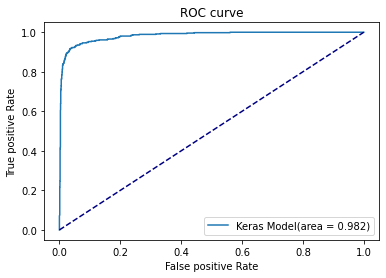

In [12]:
# 测试数据(预测数据)
y_pred = model.predict(x_test).ravel()
# 计算ROC
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred) 
# 计算 AUC
AUC = auc(fpr_keras, tpr_keras)
# 绘制 ROC曲线
plt.plot(fpr_keras, tpr_keras, label='Keras Model(area = {:.3f})'.format(AUC)) 
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False positive Rate') 
plt.ylabel('True positive Rate') 
plt.title('ROC curve') 
plt.legend(loc='best') 
plt.show()


## 建模过程的可视化处理

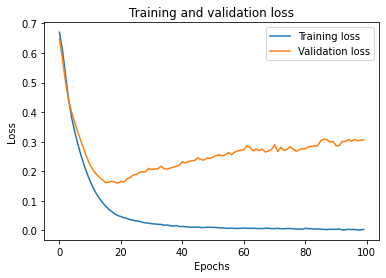

In [13]:
#plot history
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



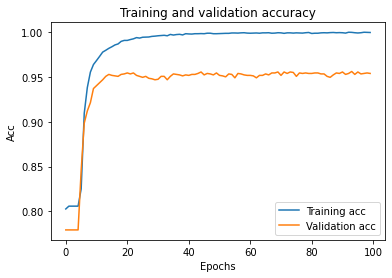

In [14]:
#plot history
plt.plot(history.history['acc'],label='Training acc')
plt.plot(history.history['val_acc'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

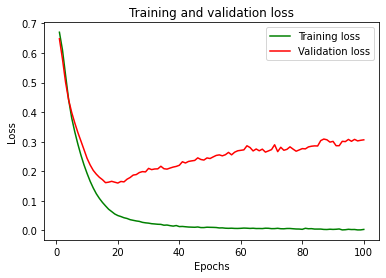

In [15]:
plt.clf()

history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'g',label='Training loss')
plt.plot(epochs,val_loss_values,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

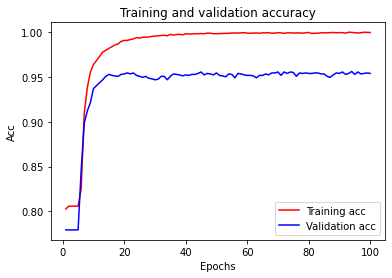

In [16]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs,acc_values,'r',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

## 参考文献reference

Fused CNN-LSTM deep learning emotion recognition model using electroencephalography signals

Transfer Learning of Deep Spatiotemporal Networks to Model Arbitrarily Long Videos of Seizures

Adversarial representation learning for robust patient-independent epileptic seizure detection
